In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('C:/Users/Sudheer/Desktop/data_banknote_authentication.txt', header=None)
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [6]:
print(data.info)

<bound method DataFrame.info of           var      skew     curt     entr  auth
0     3.62160   8.66610  -2.8073 -0.44699     0
1     4.54590   8.16740  -2.4586 -1.46210     0
2     3.86600  -2.63830   1.9242  0.10645     0
3     3.45660   9.52280  -4.0112 -3.59440     0
4     0.32924  -4.45520   4.5718 -0.98880     0
...       ...       ...      ...      ...   ...
1367  0.40614   1.34920  -1.4501 -0.55949     1
1368 -1.38870  -4.87730   6.4774  0.34179     1
1369 -3.75030 -13.45860  17.5932 -2.77710     1
1370 -3.56370  -8.38270  12.3930 -1.28230     1
1371 -2.54190  -0.65804   2.6842  1.19520     1

[1372 rows x 5 columns]>


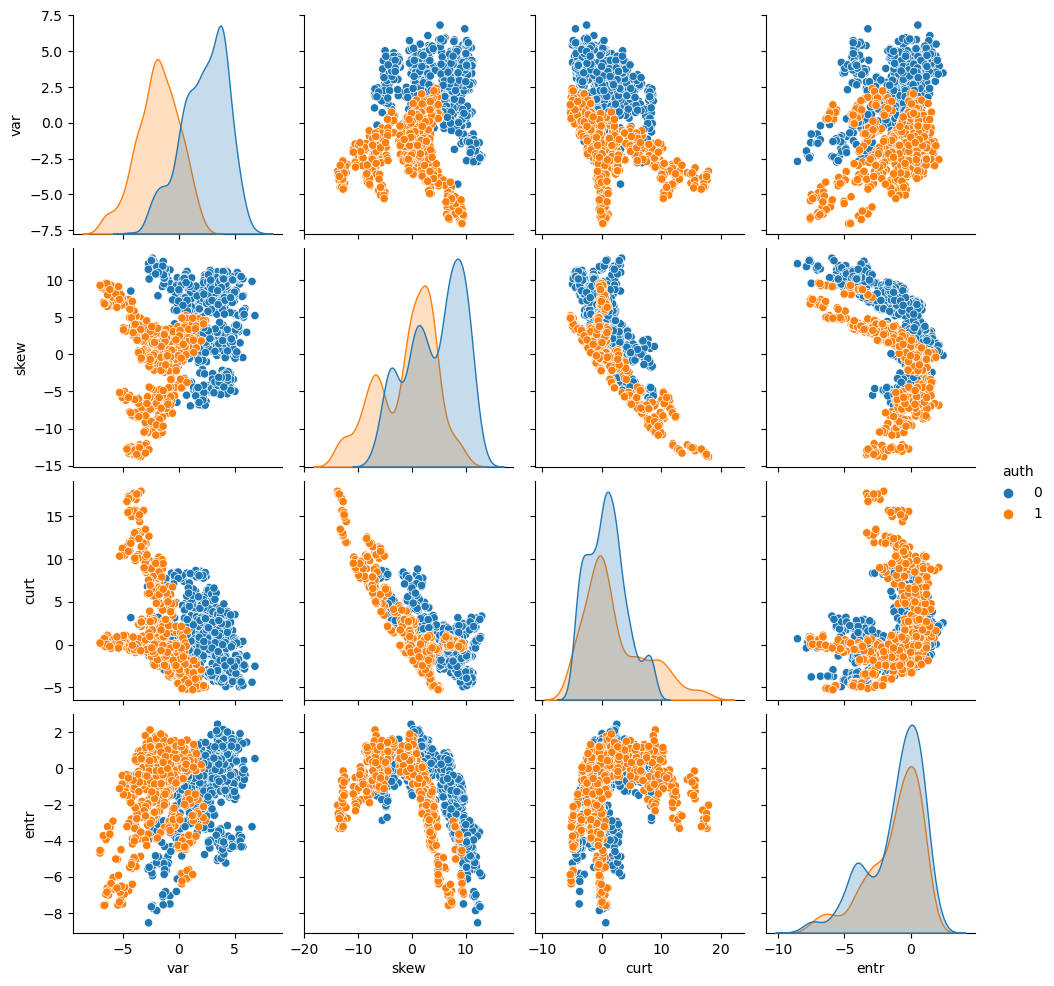

In [7]:
sns.pairplot(data, hue='auth')
plt.show()

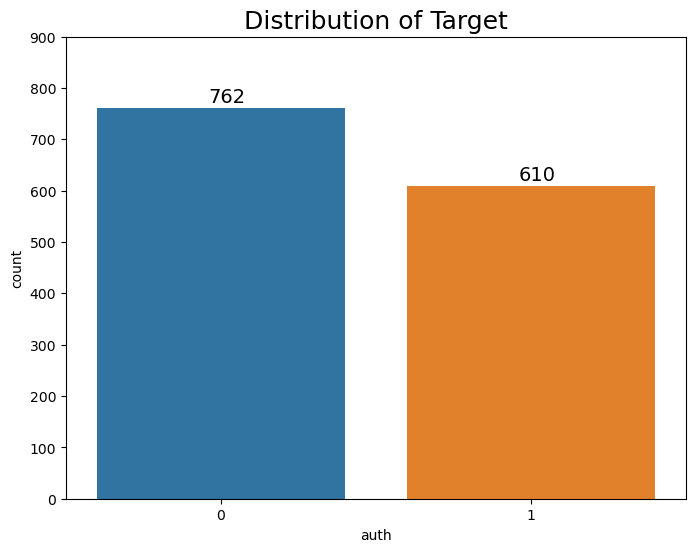

In [9]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=str(target_count[0]), xy=(-0.04, 10 + target_count[0]), size=14)
plt.annotate(text=str(target_count[1]), xy=(0.96, 10 + target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [10]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [11]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [14]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [15]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%


In [16]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.61112576 0.38887424]


C:\Users\Sudheer\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
